In [1]:
import os, sys
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.append(parent_dir)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class Analyzer:
    
    def __init__(self, network):
        self.network = network
        
    def get_degree_distribution(self):
        "Returns the plot of the degree distribution with a log-log scale"
        
        N = self.network.number_of_nodes()
        degrees = [self.network.in_degree(n) for n in self.network.nodes()] if self.network.is_directed() else [self.network.degree(n) for n in self.network.nodes()]
        
        N_k = {}
        for k in degrees:
            if k not in N_k:
                N_k[k] = 1
            else:
                N_k[k] += 1
                
        p_k = {}
        for k in N_k:
            p_k[k] = N_k[k] / N
        
        # Plotting in log-log scale
        plt.figure(figsize=(8, 6))
        plt.loglog(list(p_k.keys()), list(p_k.values()), marker='o', linestyle='None', color='b')
        plt.title('Log-log Degree Distribution')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True)

        return plt

In [3]:
import networkx as nx

G = nx.read_edgelist('net_2')

# Random Graphs

In [ ]:
from networks_gen import randomG
import random

n = 25000

# take p randomly between 1/24999 and 1
p = random.uniform(1/(n-1), 0.01)

g1 = randomG(n, p)
analyzer_g1 = Analyzer(g1)
plt = analyzer_g1.get_degree_distribution()
plt.show()

In [ ]:
print(len(g1.edges()))
print(len(g1.nodes()))

In [ ]:
# save the graph
print(p)

In [ ]:
# save the graph
print(stream_diam(g1))

# Configuration model

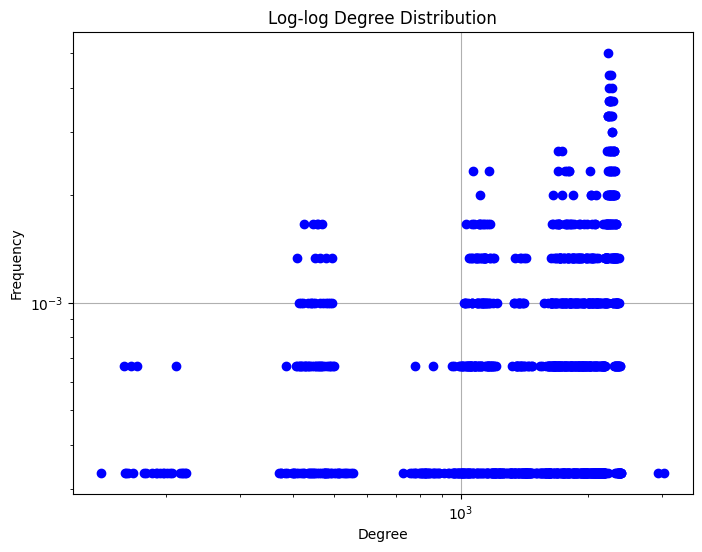

In [16]:
import networkx as nx
import numpy as np

degree_distribution = [d for _, d in G.degree()]

min = np.min(degree_distribution)
max = np.max(degree_distribution)

# normalize the degree distribution beteen 0 and max - min
normalized_degree_distribution = [d - min for d in degree_distribution]

if np.sum(normalized_degree_distribution) % 2 != 0:
    normalized_degree_distribution[0] += 1

# Generate the small graph
small_graph = nx.configuration_model(normalized_degree_distribution[:3000])

# Compute the degree distribution of the small graph
analyzer_g2 = Analyzer(small_graph)
plt = analyzer_g2.get_degree_distribution()
plt.show()

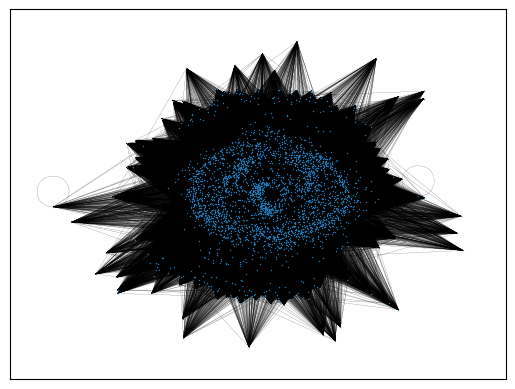

In [5]:
nx.draw_networkx(small_graph, with_labels=False, linewidths=0.01, node_size=1, width=0.1)
plt.show()

# Preferential Attachment

In [ ]:
from networks_gen import preferentialG
import random

# generate a preferential graph for n = 25000 and different values of p (between 0 excluded and 1 included) and plot the degree distribution for each graph
n = 25000

ps = [0.01, 0.1, 0.5, 0.7, 1]

# take p randomly between 1/24999 and 1
for p in ps:
    g2 = preferentialG(n, p)
    analyzer_g2 = Analyzer(g2)
    print(len(g2.edges()))
    plt = analyzer_g2.get_degree_distribution()
    plt.show()

# Generalized Watts-Strogatz

In [10]:
import networkx as nx
import numpy as np

degree_distribution = [d for _, d in G.degree()]

min = np.min(degree_distribution)
max = np.max(degree_distribution)

# normalize the degree distribution beteen 0 and max - min
normalized_degree_distribution = [d - min for d in degree_distribution]

normalized_degree_distribution = normalized_degree_distribution[:3000]

if np.sum(normalized_degree_distribution) % 2 != 0:
    normalized_degree_distribution[-1] += 1

# Generate the small graph
small_graph = nx.watts_strogatz_graph(3000, 4, 0.1)

# Compute the degree distribution of the small graph
analyzer_g2 = Analyzer(small_graph)
plt = analyzer_g2.get_degree_distribution()
plt.show()

KeyboardInterrupt: 

# Affiliation Networks